In [337]:
import pandas as pd
import numpy as np

In [338]:
df=pd.read_csv(r"C:\Users\91760\Downloads\adult_data (1).csv")
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [342]:
df['salary'].unique()
df['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [343]:
df.shape

(32561, 15)

In [344]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

PERFORMING EDA

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly as px

FINDING OUTLIERS

<AxesSubplot: >

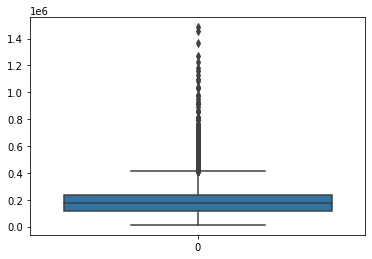

In [346]:
sns.boxplot(df['fnlwgt'])

<AxesSubplot: >

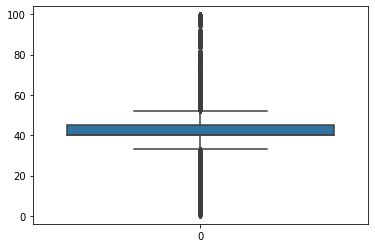

In [347]:
sns.boxplot(df['hours_per_week'])

<AxesSubplot: >

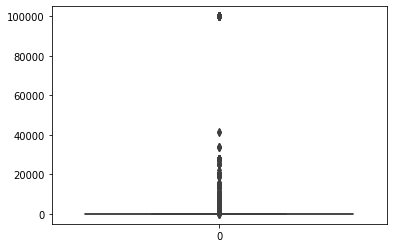

In [348]:
sns.boxplot(df['capital_gain'])

<AxesSubplot: >

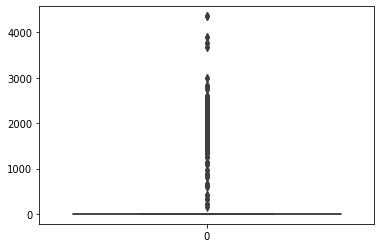

In [349]:
sns.boxplot(df['capital_loss'])

<AxesSubplot: >

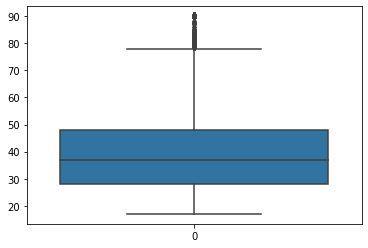

In [350]:
sns.boxplot([df['age']])

REMOVING OUTLIERS

In [256]:
def removing_outlier_from_hours_per_week(df):
    IQR=df['hours_per_week'].quantile(0.75)-df['hours_per_week'].quantile(0.25)
    Q1=df['hours_per_week'].quantile(0.75) - (1.5*IQR)
    Q3=df['hours_per_week'].quantile(0.25) + (1.5*IQR)

    df.loc[df['hours_per_week'] <= Q1,'hours_per_week'] = Q1
    df.loc[df['hours_per_week'] >= Q3,'hours_per_week'] = Q3
removing_outlier_from_hours_per_week(df)

<AxesSubplot: >

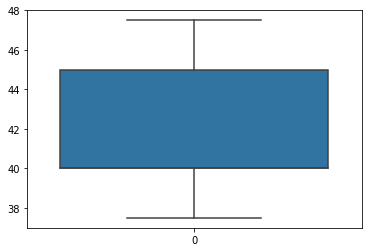

In [257]:
sns.boxplot(df['hours_per_week'])

<AxesSubplot: >

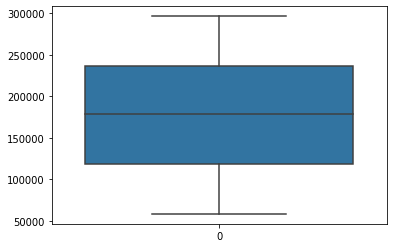

In [351]:
def removing_outlier_from_fnlwgt(dataframe):
    IQR=df['fnlwgt'].quantile(0.75)-df['fnlwgt'].quantile(0.25)
    Q1=df['fnlwgt'].quantile(0.75) - (1.5*IQR)
    Q3=df['fnlwgt'].quantile(0.25) + (1.5*IQR)

    df.loc[df['fnlwgt'] <= Q1,'fnlwgt'] = Q1
    df.loc[df['fnlwgt'] >= Q3,'fnlwgt'] = Q3
removing_outlier_from_fnlwgt(df)
sns.boxplot(df['fnlwgt'])

<AxesSubplot: >

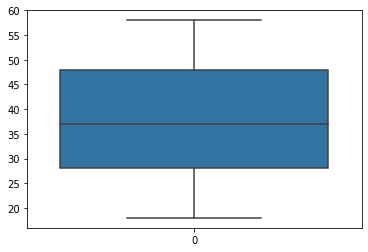

In [352]:
def removing_outlier_from_age(dataframe):
    IQR=df['age'].quantile(0.75)-df['age'].quantile(0.25)
    Q1=df['age'].quantile(0.75) - (1.5*IQR)
    Q3=df['age'].quantile(0.25) + (1.5*IQR)

    df.loc[df['age'] <= Q1,'age'] = Q1
    df.loc[df['age'] >= Q3,'age'] = Q3
removing_outlier_from_age(df)
sns.boxplot(df['age'])

<AxesSubplot: >

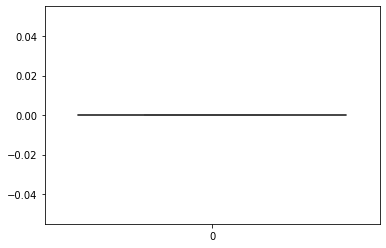

In [362]:
def removing_outlier_from_age(dataframe):
    IQR=df['capital_loss'].quantile(0.75)-df['capital_loss'].quantile(0.25)
    Q1=df['capital_loss'].quantile(0.75) - (1.5*IQR)
    Q3=df['capital_loss'].quantile(0.25) + (1.5*IQR)

    df.loc[df['capital_loss'] <= Q1,'capital_loss'] = Q1
    df.loc[df['capital_loss'] >= Q3,'capital_loss'] = Q3
removing_outlier_from_age(df)
sns.boxplot(df['capital_loss'])

In [353]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

CHECKING FOR NULL VALUES

In [354]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [355]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

EDA

<AxesSubplot: xlabel='education_num', ylabel='capital_gain'>

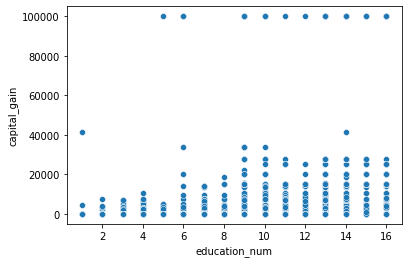

In [363]:
sns.scatterplot(df,x='education_num',y='capital_gain')

<AxesSubplot: xlabel='education_num', ylabel='capital_loss'>

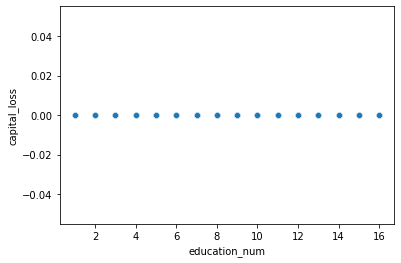

In [364]:
sns.scatterplot(df,x='education_num',y='capital_loss')

In [357]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot: xlabel='salary', ylabel='age'>

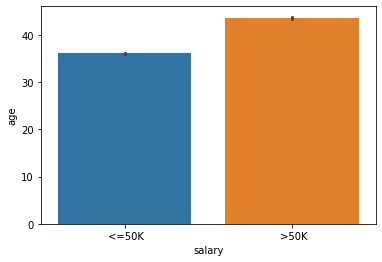

In [272]:
sns.barplot(df,x='salary',y='age')

<AxesSubplot: xlabel='age', ylabel='education'>

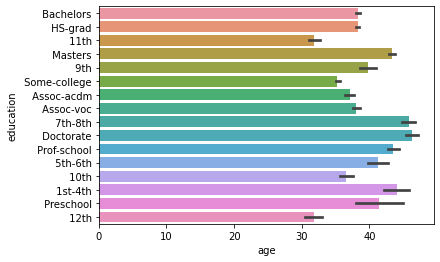

In [358]:
sns.barplot(df,x='age',y='education')

<AxesSubplot: xlabel='age', ylabel='occupation'>

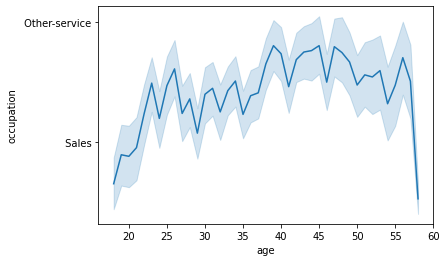

In [359]:
sns.lineplot(df,x='age',y='occupation')

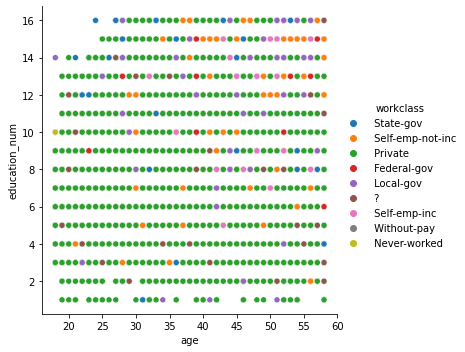

In [360]:
sns.relplot(x='age',y='education_num',data=df,kind='scatter',hue='workclass',height=5)

<AxesSubplot: xlabel='age', ylabel='capital_gain'>

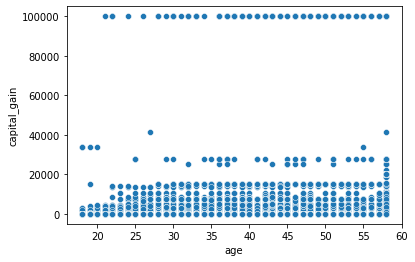

In [365]:
sns.scatterplot(df,x='age',y='capital_gain')

<AxesSubplot: xlabel='hours_per_week', ylabel='Count'>

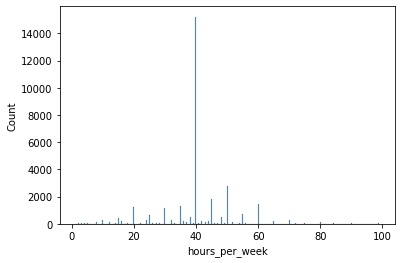

In [366]:
sns.histplot(df['hours_per_week'])

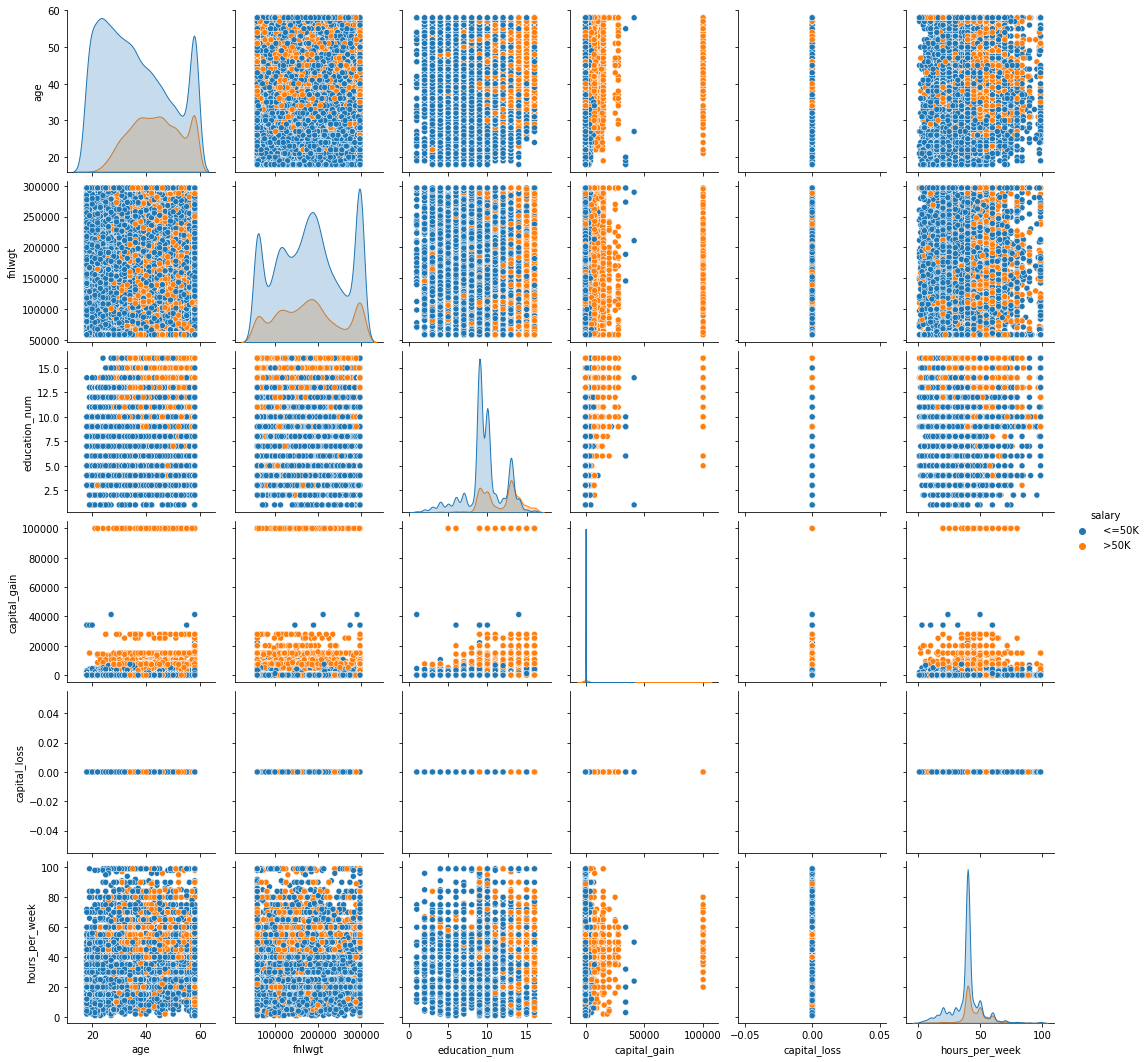

In [367]:
sns.pairplot(df,hue='salary')

In [372]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

APPLYING FEATURE ENGINEERING

In [373]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
lbl.fit_transform(df['sex'])
df['sex'] = lbl.fit_transform(df['sex'])

In [374]:
df['salary']=lbl.fit_transform(df['salary'])

In [375]:
df['race']=lbl.fit_transform(df['race'])

In [376]:
df['native_country']=lbl.fit_transform(df['native_country'])

In [377]:
df['workclass']=lbl.fit_transform(df['workclass'])

In [378]:
df['relationship']=lbl.fit_transform(df['relationship'])

In [379]:
df['education']=lbl.fit_transform(df['education'])

In [380]:
df['occupation']=lbl.fit_transform(df['occupation'])

In [381]:
df['marital_status']=lbl.fit_transform(df['marital_status'])

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [383]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,296663,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [400]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()

In [388]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [394]:
y=df[['salary']]

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [449]:
X_train_trans=sc.fit_transform(X_train)

In [450]:
x_test_trans=sc.transform(X_test)

In [451]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [452]:
dt=tree.DecisionTreeClassifier()

In [453]:
dt.fit(X_train_trans,y_train)

DecisionTreeClassifier()

In [455]:
y_pred=dt.predict(x_test_trans)

In [456]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [482]:
accuracy_score(y_test,y_pred)

0.8159066482419776

In [483]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4412  560]
 [ 639  902]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4972
           1       0.62      0.59      0.60      1541

    accuracy                           0.82      6513
   macro avg       0.75      0.74      0.74      6513
weighted avg       0.81      0.82      0.81      6513



In [487]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [488]:
kf=KFold(n_splits=10)

In [489]:
df3=DecisionTreeClassifier()
df3.fit(X_train_trans,y_train)
ypred=df3.predict(x_test_trans)
ypred
accuracy_score(y_test,ypred)

0.816981421771841

In [494]:
res=cross_val_score(df3,X,y,cv=kf,scoring='accuracy') 

In [495]:
res

array([0.80472828, 0.81695332, 0.81296069, 0.79944717, 0.82094595,
       0.80589681, 0.81142506, 0.81418919, 0.81142506, 0.8009828 ])

In [499]:
res1=cross_val_predict(df3,X_test,y_test,cv=kf)

In [505]:
accuracy_score(y_test,res1)

0.8074619990787656